In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils_ode import *
from ode import *
from utils_verify import max_lyapunov_exponent, compute_power_spectrum, max_lyapunov_benettin
from utils_ode import parse_ode_equations, plot_3d_ode, plot_power_spectrum

Plot fused lorenz and lv

In [6]:
vecs = np.load('./results/simple_test_5/vecs_lv_shifted_lorenz_shifted_transfer_simple_test_5.npy')

In [39]:
'''
init_point=[1,1,1], num_points=20000, 0-100
'''
system_label = [3,3]
vec=vecs[system_label[0], system_label[1]]
root_dir = './pic_0406night/'
attractor_save_dir = root_dir + f'attractor_{system_label[0]}{system_label[1]}'
power_save_dir = root_dir + f'power_{system_label[0]}{system_label[1]}'

grid_limits = [[-25, 25], [-25, 25], [0, 50]]
grid_shape = (48, 48, 48)

grids = calc_grids(grid_limits, grid_shape)
ode_shifted = vec2ode(vec, grids=grids, max_order=2, mode='linear', name='fusion_shifted')

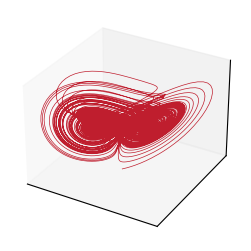

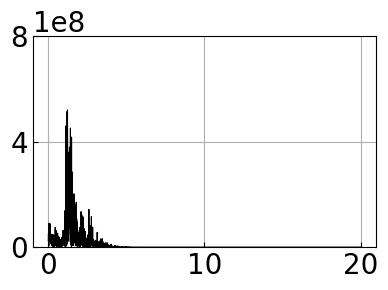

In [40]:
f = parse_ode_equations(ode_shifted.info)
plot_3d_ode(f, w0=[1,1,1], t_span=(0, 80), num_points=16000, method='RK45', plot_simple=True, plot_save=True, pic_save_dir=attractor_save_dir)
plot_power_spectrum(f, w0=[1,1,1], t_span=(0, 100), num_points=20000, freq_range=(0,20), variable_idx=0, method='RK45', plot_simple=False, plot_save=True, pic_save_dir=power_save_dir)
#w1_0 = [1, 1, 1]  # 任选一个初始条件
#lyap_est = max_lyapunov_benettin(f, w1_0, delta0=1e-8, T=0.5, steps=500)
#output_file = root_dir + f"lyapunov_result_{system_label[0]}{system_label[1]}.txt"  # 你可以自定义文件名和路径
#with open(output_file, "w") as f_out:
#    f_out.write(f"Lyapunov_exponent_estimate_{system_label[0]}{system_label[1]} " + str(lyap_est))


Plot lorenz and lv

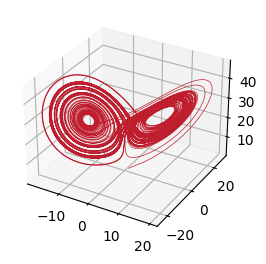

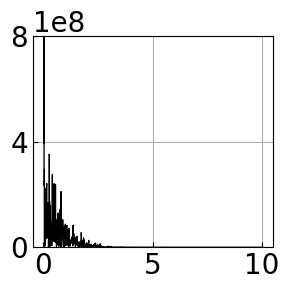

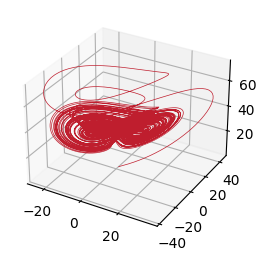

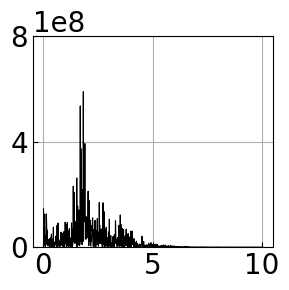

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

# Lorenz 系统定义（默认参数：sigma=10, beta=8/3, rho=28）
def lorenz_system(t, state, sigma=10, beta=8/3, rho=28):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Lü 系统定义（默认参数：a=36, b=3, c=27.5）
def lu_system(t, state, a=36, b=3, c=27.5):
    x, y, z = state
    dxdt = a * (y - x)
    dydt = -x * z + c * y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

# 下面假设 attractor_save_dir 与 power_save_dir_verbose 已定义为保存图像的路径

# 示例 1：使用 Lorenz 系统绘制图像和功率谱
f = lorenz_system  # 选择 Lorenz 系统
plot_3d_ode(
    f,
    w0=[1, 1, 1],
    t_span=(0, 80),
    num_points=20000,
    method='RK45',
    plot_simple=True,
    plot_save=True,
    pic_save_dir='./pic_0406night/'+'lorenz_attractor'
)
plot_power_spectrum(
    f,
    w0=[1, 1, 1],
    t_span=(0, 100),
    num_points=20000,
    freq_range=(0, 10),
    variable_idx=0,
    method='RK45',
    plot_simple=False,
    plot_save=True,
    pic_save_dir='./pic_0406night/'+'lorenz_power'
)

# 示例 2：使用 Lü 系统绘制图像和功率谱
f = lu_system  # 切换到 Lü 系统
plot_3d_ode(
    f,
    w0=[1, 1, 1],
    t_span=(0, 50),
    num_points=20000,
    method='RK45',
    plot_simple=True,
    plot_save=True,
    pic_save_dir='./pic_0406night/'+'lv_attractor'
)
plot_power_spectrum(
    f,
    w0=[1, 1, 1],
    t_span=(0, 100),
    num_points=20000,
    freq_range=(0, 10),
    variable_idx=0,
    method='RK45',
    plot_simple=False,
    plot_save=True,
    pic_save_dir='./pic_0406night/'+'lv_power'
)


Plot lorenz and chen

In [6]:
# lorenz content:0.0/0.1/0.5/0.9/1.0 chen style:0.01
vecs1 = np.load('./results/fusion_lorenz_etal_0/vecs_lorenz_shifted_chen_shifted_transfer_fusion_lorenz_etal_0.npy')
# lorenz content:0.001/0.01/0.02/0.05 chen style:0.01
vecs2 = np.load('./results/fusion_lorenz_etal_2/vecs_lorenz_shifted_chen_shifted_transfer_fusion_lorenz_etal_2.npy')

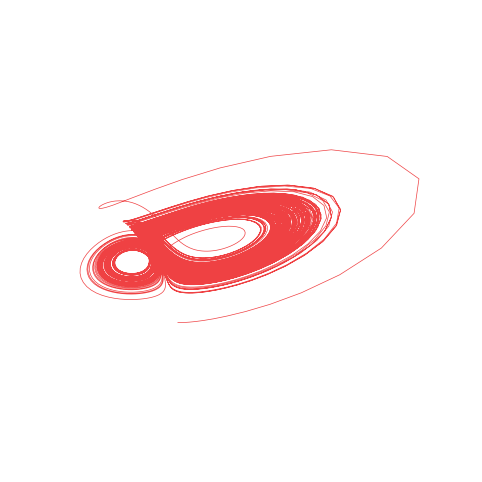

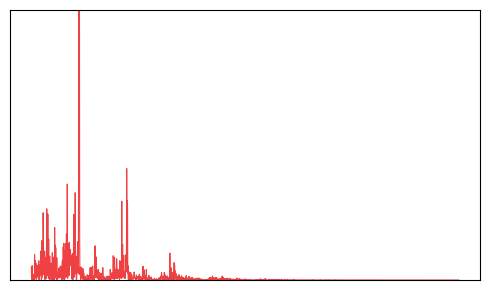

KeyboardInterrupt: 

In [7]:
'''
init_point=[1,1,1], num_points=20000, 0-100
'''
system_label = [3,0]
vec=vecs2[system_label[0], system_label[1]]
root_dir = './pic_lorenz_etal_2/'
attractor_save_dir = root_dir + f'attractor_{system_label[0]}{system_label[1]}'
power_save_dir = root_dir + f'power_{system_label[0]}{system_label[1]}'

grid_limits = [[-25, 25], [-25, 25], [0, 50]]
grid_shape = (48, 48, 48)

grids = calc_grids(grid_limits, grid_shape)
ode_shifted = vec2ode(vec, grids=grids, max_order=2, mode='linear', name='fusion_shifted')

f = parse_ode_equations(ode_shifted.info)
plot_3d_ode(f, w0=[1,1,1], t_span=(0, 100), num_points=20000, method='RK45', plot_simple=True, plot_save=True, pic_save_dir=attractor_save_dir)
plot_power_spectrum(f, w0=[1,1,1], t_span=(0, 100), num_points=20000, freq_range=(0,20), variable_idx=0, method='RK45', plot_simple=True, plot_save=True, pic_save_dir=power_save_dir)
w1_0 = [1, 1, 1]  # 任选一个初始条件
lyap_est = max_lyapunov_benettin(f, w1_0, delta0=1e-8, T=0.5, steps=500)
output_file = root_dir + f"lyapunov_result_{system_label[0]}{system_label[1]}.txt"  # 你可以自定义文件名和路径
with open(output_file, "w") as f_out:
   f_out.write(f"Lyapunov_exponent_estimate_{system_label[0]}{system_label[1]} " + str(lyap_est))